In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import math
import scipy.stats

/home/franel/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/franel/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/franel/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/franel/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = pd.read_csv("../kc_house_data.csv")
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890.0,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715.0,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060.0,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050.0,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890.0,0,2003,0,98038,47.3684,-122.031,2390,7570


[(0, 19489), (1, 332), (2, 963), (3, 510), (4, 319)]
0
4


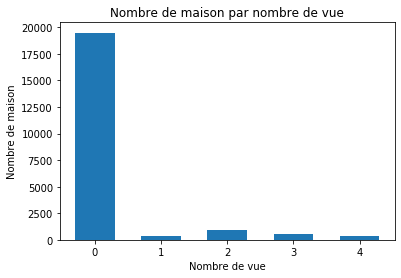

In [235]:
floors = defaultdict(int)
for nbre in data['view']:
    floors[nbre] += 1
floors = sorted(floors.items(), key=lambda x: x[0])
print(floors)
print(np.min(data['view']))
print(np.max(data['view']))

plt.bar([x for (x,y) in floors], [y for (x,y) in floors], linewidth = 2, width = 0.6)
#plt.axis([0, 4, 0, 12000])
#plt.xticks([i for i,_ in enumerate(histogram.keys())], histogram.keys())
plt.xlabel("Nombre de fois que la maison a été vue")
plt.ylabel("Nombre de maison")
plt.title("Nombre de maison par nombre de vue")
plt.savefig('view.png', transparent = True)
plt.show()
plt.close()

[(0, 19489), (1, 332), (2, 963), (3, 510), (4, 319)]


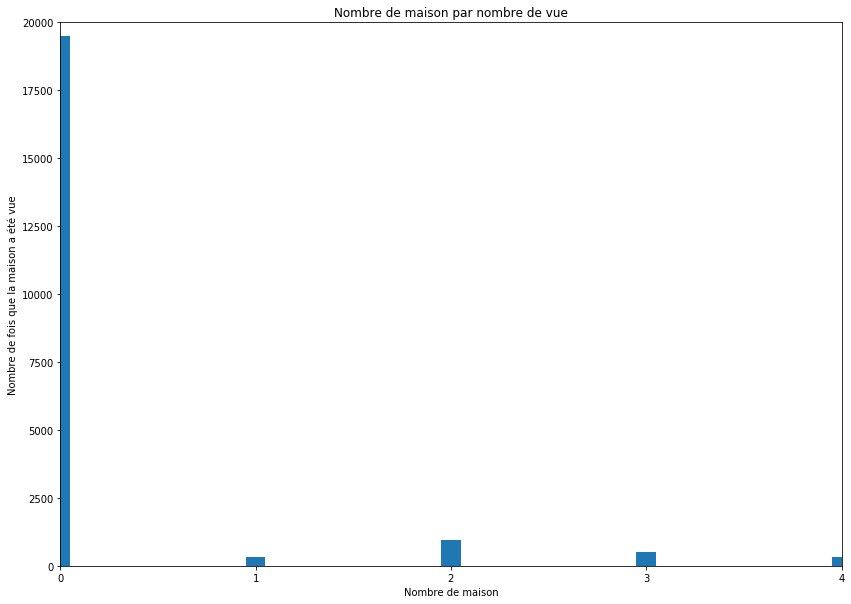

In [7]:
view = defaultdict(int)
for nbre in data['view']:
    view[nbre] += 1
view = sorted(view.items(), key=lambda x: x[0])
print(view)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))

axes.bar([x for (x,y) in view], [y for (x,y) in view], width=0.1)
axes.set_xticks([x for (x,y) in view])
axes.axis([0, 4, 0, 20000])
axes.set_ylabel("Nombre de fois que la maison a été vue")
axes.set_xlabel("Nombre de maison")
axes.set_title("Nombre de maison par nombre de vue")
fig.savefig('view.png', transparent = True)
#fig.show()
#axes.close()

In [236]:
#Moyenne
moyenne = np.mean(data['view'])
print(moyenne)

0.23430342849211122


In [237]:
#Mediane
mediane = np.median(data['view'])
print(mediane)

0.0


In [238]:
#Variance
def sum_of_square(V):
    return np.dot(V,V)

def moyenne_(X):
    moyenne = np.mean(X)
    return [x-moyenne for x in X]

def variance(X):
    n = len(X)
    deviation = moyenne_(X)
    return sum_of_square(deviation) / (n-1)

print(variance(data['view']))

0.5872426169774144


In [209]:
#Variance
print(np.var(data['view']))

0.29157451555210684


In [210]:
#Ecart type
print(np.nanstd(data['view']))

0.5399764027733692


In [239]:
#Ecart type
print(math.sqrt(variance(data['view'])))

0.7663175692736103


In [159]:
#Ecart type
print(math.sqrt(np.var(data['view'])))

41419.55327262748
